In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
user_data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-p-rudenko/shared/homeworks/python_ds_miniprojects/3/user_data.csv')
logs = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-p-rudenko/shared/homeworks/python_ds_miniprojects/3/logs.csv')

In [3]:
logs

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


Какой клиент совершил больше всего успешных операций?

Если несколько пользователей совершили одинаковое число успешных действий, перечислите их идентификаторы (client) через запятую и пробел в порядке возрастания. Например:

In [26]:
logs.query("success == True")\
     .groupby('client')\
     .agg({'success':'sum'})\
     .sort_values('success',ascending = False)\
     .query ("success ==success.max()")\
     .client.to_list()

[12179, 61468, 52870, 61473, 92584, 82563, 78349, 36165, 28719]

In [4]:
success_counts = logs.query("success == True")\
    .value_counts('client')\

In [18]:
success_counts

client
61473    41
92584    41
36165    41
52870    41
28719    41
         ..
66266     1
66245     1
66064     1
65936     1
40        1
Length: 2845, dtype: int64

In [16]:
max_number = success_counts.max()

In [30]:
max_number_users = success_counts.loc[(success_counts==max_number)]

In [33]:
users = max_number_users.index.sort_values()

In [34]:
users

Int64Index([12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584], dtype='int64', name='client')

Какая платформа наиболее популярна среди премиумных клиентов?



In [20]:
full_data = logs.merge(user_data, on = 'client') #соединяем две таблицы

In [47]:
full_data

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
4,61468,True,phone,1585441266,False,25
...,...,...,...,...,...,...
3434,62438,False,phone,1585479041,False,36
3435,95152,True,computer,1585420263,False,67
3436,64496,False,computer,1585459072,False,66
3437,8967,True,phone,1585465121,False,33


In [92]:
full_data.query ('premium == True')\
    .value_counts('platform')

platform
phone       246
computer    150
tablet       24
dtype: int64

Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет), используя библиотеку seaborn с параметрами цвета по умолчанию. Какой график получится в результате?

In [88]:
full_data.query ('premium == True') #датасет с премиальными клиентами
age_not_premium = full_data.query ('premium == False') #датасет с непримиальными клиентами

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


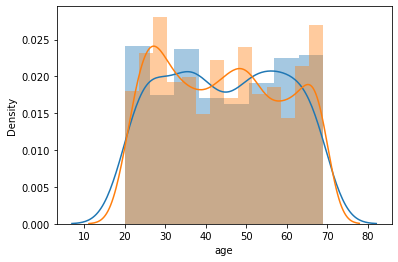

In [17]:
#строим графики по двум датасетам
sns.distplot (full_data.query ('premium == True').age)
sns.distplot (full_data.query ('premium == False').age)


Постройте график распределения числа успешных операций: 

x – число успешных операций
y – число клиентов, совершивших столько успешных операций
Если нужна помощь, напишите сюда

In [21]:
#новый датасет с колонками - клиент и количество успешных операций
success_df = full_data.groupby ('client', as_index = False)\
    .agg ({'success':'count'})\
    .sort_values('success', ascending = False)

In [95]:
success_df

,client,success
1791,61468,42
1792,61473,41
1862,64064,41
2306,78349,41
2723,92584,41
...,...,...
998,35037,1
999,35107,1
1000,35126,1
1001,35162,1


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


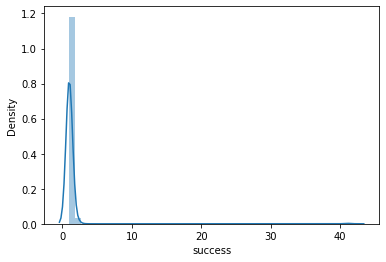

In [96]:
sns.distplot(success_df.success)

⭐️Задание со звёздочкой!⭐️

Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot. По оси x – возраст, y – число успешных операций. Если размер графика получается небольшим, можно добавить plt.figure(figsize=(12, 8)) в начало соответствующей ячейки. 

Полезные ссылки:

sns.countplot – документация к типу графика
figsize – про размер графиков
Вопрос: Клиенты какого возраста совершили наибольшее количество успешных действий?

Если нужна помощь, напишите сюда

In [97]:
full_data

,client,success,platform,time,premium,age,success_count
0,61468,True,phone,1585425658,False,25,NaN
1,61468,True,computer,1585460504,False,25,NaN
2,61468,True,computer,1585430291,False,25,NaN
3,61468,True,computer,1585444317,False,25,NaN
4,61468,True,phone,1585441266,False,25,NaN
...,...,...,...,...,...,...,...
3434,62438,False,phone,1585479041,False,36,NaN
3435,95152,True,computer,1585420263,False,67,NaN
3436,64496,False,computer,1585459072,False,66,NaN
3437,8967,True,phone,1585465121,False,33,NaN


In [22]:
success_comp = full_data.query ("platform == 'computer' and success == True")\
    

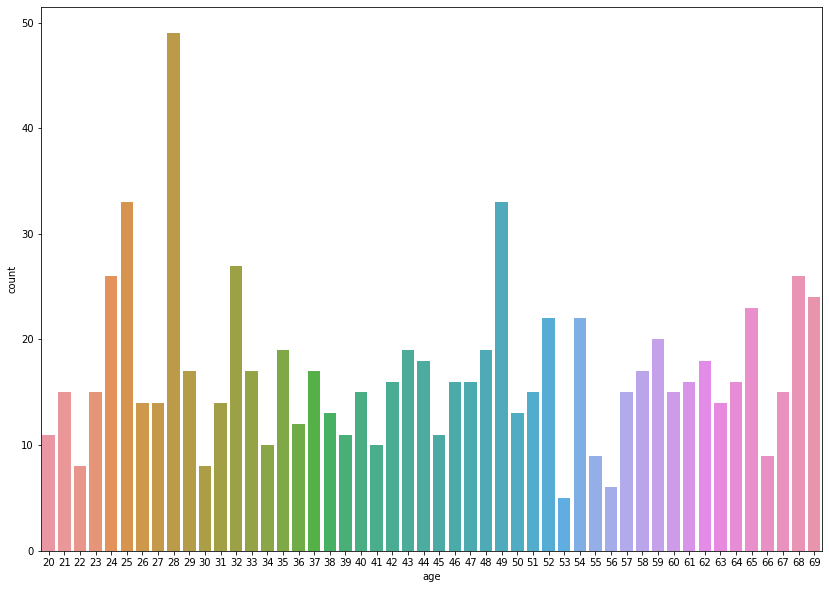

In [33]:
plt.figure(figsize=(14, 10))
sns.countplot (x = 'age', data = success_comp)
#sns.countplot (full_data.query ("platform == 'computer' and success == True").age)

In [34]:
success_comp.dtypes

client       int64
success       bool
platform    object
time         int64
premium       bool
age          int64
dtype: object